In [1]:
import os
import pandas as pd
from pydataset import data
import env
import seaborn as sns

# import our own acquire module
import acquire

import numpy as np
import matplotlib.pyplot as plt


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from prepare import my_train_test_split

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

**Nº1 Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:**

        a / Acquire, prepare & split your data.

        b / Univariate Stats

            - For each measurement type (quantitative variable): create a histogram, boxplot, & compute 
            descriptive statistics (using .describe()).

            - For each species (categorical variable): create a frequency table and a bar plot of those 
            frequencies.
    
            - Document takeaways & any actions.


In [4]:
iris_db = acquire.get_iris_data(env.sql_connexion)

iris_db.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [11]:
iris_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [16]:
iris_db.isna().sum()

species_id        0
species_name      0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
dtype: int64

In [27]:
iris_db = iris_db.rename(columns = {"species_name": "species"})
iris_db.head()

## renaming 'species_name' column to 'species'

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [28]:
## transforming 'species' via one-hot encoding

dummy_iris = pd.get_dummies(iris_db[['species']])

In [40]:
## putting numeric dyptes into variables 

num_vars = iris_db.select_dtypes(include = ['int64', 'float64'])

In [39]:
## putting categorical dyptes into variables 

cat_vars = iris_db.select_dtypes(include = ['object'])

In [41]:
concat_dummy_iris = iris_db = pd.concat([iris_db, dummy_iris], axis = 1)

concat_dummy_iris.head()

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica,species_setosa,species_versicolor,species_virginica,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0,1,0,0,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0,1,0,0,1,0,0
2,1,setosa,3,4.7,3.2,1.3,0.2,1,0,0,1,0,0,1,0,0
3,1,setosa,4,4.6,3.1,1.5,0.2,1,0,0,1,0,0,1,0,0
4,1,setosa,5,5.0,3.6,1.4,0.2,1,0,0,1,0,0,1,0,0


In [34]:
def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [36]:
itrain, ivalidate, itest = my_train_test_split(iris_db, target = 'species')

itrain.shape, ivalidate.shape, itest.shape

((90, 13), (30, 13), (30, 13))

b / Univariate Stats

        - For each measurement type (quantitative variable): create a histogram, boxplot, & compute 
        descriptive statistics (using .describe()).

        - For each species (categorical variable): create a frequency table and a bar plot of those 
        frequencies.

        - Document takeaways & any actions.

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


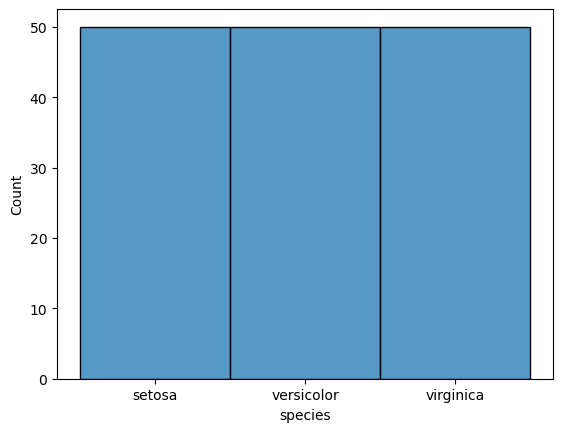

In [42]:
## make a loop with all the CATEGORICAL variables
## histogram

for column in cat_vars:
    print(column)
    print(itrain[column].value_counts())                           ## value count of each
    print(itrain[column].value_counts(normalize = True) * 100)     ## pc of each column
    sns.histplot(x = column, data = iris_db)
    plt.show()

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


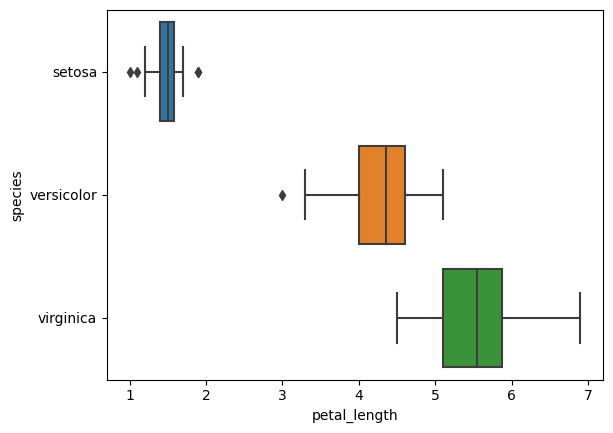

In [47]:
## categorical
## boxplot

for column in cat_vars:
    print(column)
    print(itrain[column].value_counts())                           ## value count of each
    print(itrain[column].value_counts(normalize = True) * 100)     ## pc of each column
    sns.boxplot(x = 'petal_length', y = 'species', data = iris_db)
    plt.show()

In [52]:
iris_db.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

Takeaway :
        
        The petal length of iris setosa is the most limited in range, and the petal length is also the smallest of all three iris species. Iris virginica has the largest petal length, and also the widest range of lengths.

species_id


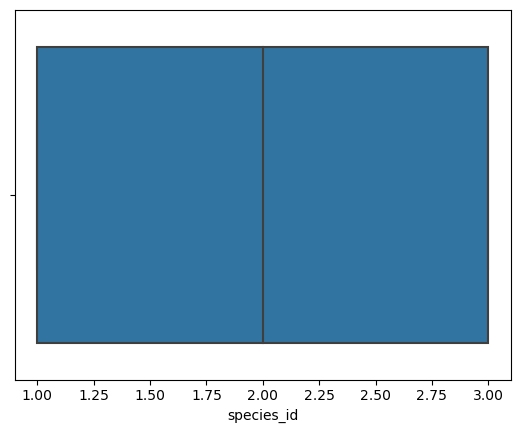

measurement_id


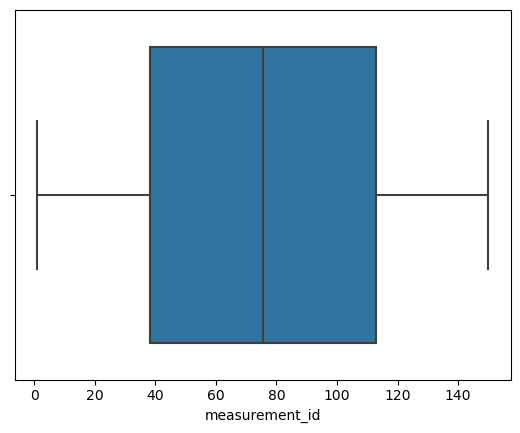

sepal_length


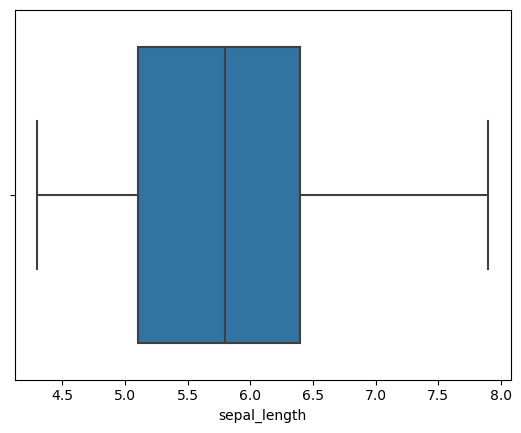

sepal_width


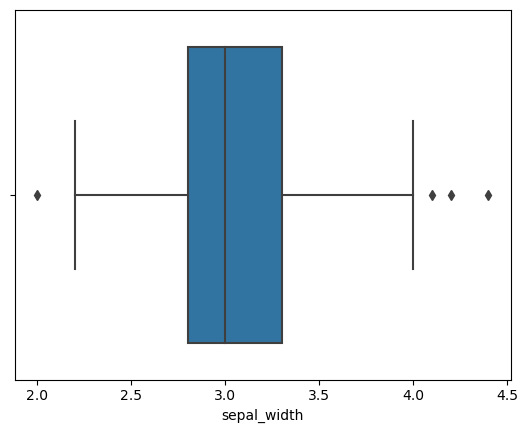

petal_length


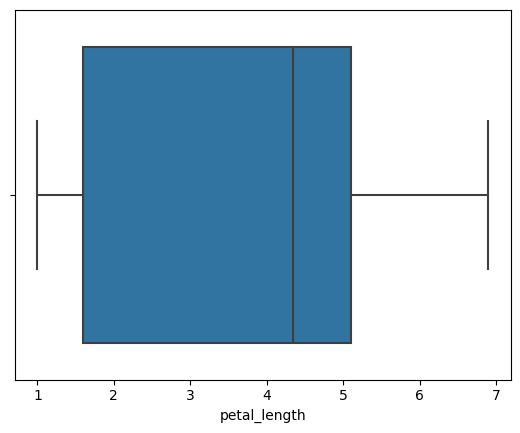

petal_width


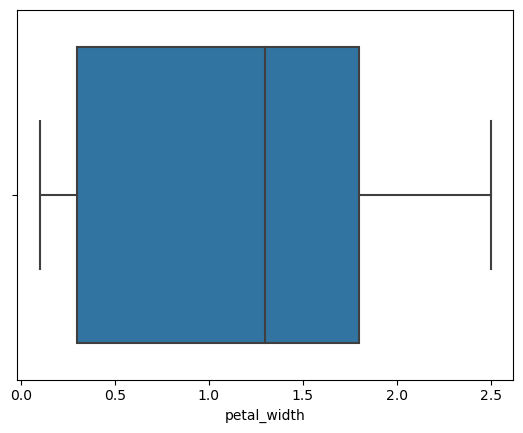

In [44]:
## make a loop with all the NUMERICAL variables

for column in num_vars:
    print(column)
    sns.boxplot(x = column, data = iris_db)
    plt.show()